# <span style="color:#0b486b">  FIT5215: Deep Learning (2022)</span>
***
*CE/Lecturer:*  **Dr Trung Le** | trunglm@monash.edu <br/> <br/>
*Tutor:*  **Mr Tuan Nguyen**  \[tuan.ng@monash.edu \] |**Mr Anh Bui** \[tuananh.bui@monash.edu\] | **Mr Xiaohao Yang** \[xiaohao.yang@monash.edu \] | **Mr Md Mohaimenuzzaman** \[md.mohaimen@monash.edu \] |**Mr Thanh Nguyen** \[Thanh.Nguyen4@monash.edu \] |
<br/> <br/>
Faculty of Information Technology, Monash University, Australia
******

# <span style="color:#0b486b">Tutorial 3b: Feed-forward Neural Nets with TensorFlow 2.x</span>
**This continues Tutorial 2a and shows you how to implement a feedforward neural network using TF 2.x**:  
- ***Inspect how to use keras in TF 2.x to fulfill the task. As you can see later, the implementation is much simpler*.**


***

### <span style="color:#0b486b"> II.1 Feedforward Neural Network </span> <span style="color:red">***** (highly important)</span>
#### <span style="color:#0b486b"> Tutorial objective </span>

In this tutorial we will consider a fairly realistic deep NNs with *three* layers plus the *output* layer. Its architecture will be specified as: $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLu) \rightarrow 26$. This means:
- Input size is 16
- First layer has 10 hidden units with ReLU activation function
- Second layer has 20 hidden units with 20 ReLU activiation function
- Third layer has 15 hidden units with 15 ReLU activiation function
- And output layer is logit layer with 26 hidden units

This network, for example, can take the `letter` dataset input with $16$ features and with $26$ classes (A-Z). **Our objective in this tutorial is to implement this specific network in `TensorFlow 2.x`.**

### <span style="color:#0b486b"> II.2 Implementation with TensorFlow 2.x</span> <span style="color:red">***** (highly important)</span>
We now shall implement the aforementioned network with the architecture of $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLu) \rightarrow 26$ in Tensorflow using the dataset `letter`. 

This letter dataset can be found at [the LIBSVM website](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#letter). Here is the dataset information:
-  *The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15*

A typical pipeline process of implementing a deep learning model is as follows:

1. **Data processing**: 
    - Load the dataset and split into train, valid, and test sets.  
     
2. **Building the model**: 
    - Build the model using keras layers.
     
3. **Compiling the model**: 
    - Compile the model and specify the optimizer, the loss (e.g., cross-entropy loss) you want to optimize, metrics you want to measure. 
    
4. **Training and evalutating**:
    - Train the model with specific training set and validation set in a number of epochs.
    - Predict on the test set and assess its performance.

#### <span style="color:#0b486b">1. Data Processing </span>

We use `sklearn` to load the dataset.

In [2]:
import os
import numpy as np
from sklearn.datasets import load_svmlight_file

In [3]:
data_file_name= "letter_scale.libsvm"
data_file = os.path.abspath("./Data/" + data_file_name)
X_data, y_data = load_svmlight_file(data_file)
X_data= X_data.toarray()
y_data= y_data.reshape(y_data.shape[0],-1)
print("X data shape: {}".format(X_data.shape))
print("y data shape: {}".format(y_data.shape))
print("# classes: {}".format(len(np.unique(y_data))))
print(np.unique(y_data))

X data shape: (15000, 16)
y data shape: (15000, 1)
# classes: 26
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26.]


We use `sklearn` to split the dataset into the train, validation, and test sets. 


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

def train_valid_test_split(data, target, train_size, test_size):
    valid_size = 1 - (train_size + test_size)
    X1, X_test, y1, y_test = train_test_split(data, target, test_size = test_size, random_state= 33)
    X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size = float(valid_size)/(valid_size+ train_size))
    return X_train, X_valid, X_test, y_train, y_valid, y_test

Next, we would like to encode the label in the form of numeric vector. For example, we want to turn $y\_data=["cat", "dog", "cat", "lion", "dog"]$ to $y\_data=[0,1,0,2,1]$.

To do this, in the following segment of code, we use the object `le` as an instance of the class `preprocessing.LabelEncoder()` which supports us to transform catefgorial labels in `y_data` to numerical vector.

In [5]:
le = preprocessing.LabelEncoder()
le.fit(y_data.ravel())
y_data= le.transform(y_data)
y_data = y_data.ravel()
print(y_data[:])

[25 15 18 ...  0 11 21]


/Users/tbui0018/opt/anaconda3/envs/tf20py37/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We now use the function defined above to prepare our data for training, validating and testing.

In [6]:
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data, 
                                                                            train_size=0.8, 
                                                                            test_size=0.1)
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)
y_valid= y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("lables: {}".format(np.unique(y_train)))

(12000, 16) (1500, 16) (1500, 16)
(12000,) (1500,) (1500,)
lables: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [7]:
train_size= int(X_train.shape[0])
n_features= int(X_train.shape[1])
n_classes= len(np.unique(y_train))

#### <span style="color:#0b486b">2. Build up the model </span>

We build up a feedforward neural network with the architecture: $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLu) \rightarrow 26$ in TensorFlow 2.x.

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [9]:
print(tf.__version__)

2.2.0


In [10]:
tf.random.set_seed(1234)

In [11]:
dnn_model = Sequential()
dnn_model.add(Dense(units=10,  input_shape=(16,), activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=15, activation='relu'))
dnn_model.add(Dense(units=n_classes, activation='softmax'))

In [12]:
dnn_model.build()
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                416       
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [13]:
dnn_model.layers

In [14]:
hidden1 = dnn_model.layers[0]
hidden1
print(hidden1.name)

dense


In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights.shape

(16, 10)

In [17]:
biases.shape

(10,)

#### <span style="color:#0b486b">3. Compiling Model </span>

In [18]:
dnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

#### <span style="color:#0b486b">4. Training and Evaluating </span>

##### <span style="color:#0b486b"> Visualizing Training Progress </span>
In this example, we demonstrate two approaches to visualize training progress, using a History object and using TensorBoard.

**Using History object** 
The history object is the output of `fit()` method, which contains the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). The training need to be finished before we can visualize using the history output. 

**Using TensorBoard**
To visualize with TensorBoard we first need to create a `tensorboard callback` method with specific log directory. We then pass the callback method to `model.fit()` method. Unlike the previous method, the callback method writes log data to the log file on-the-fly. Therefore, by opening Tensorboard on a separate browser, we can train a model and parallelly visualize the training progress.

In [19]:
from tensorflow import keras
logdir = "tf_logs/"

# Init a tensorboard_callback 
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Call the fit method, passing the tensorboard_callback 
history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, 
                        epochs=20, 
                        validation_data=(X_valid, y_valid), 
                       callbacks=[tensorboard_callback])

Train on 12000 samples, validate on 1500 samples
Epoch 1/20
12000/12000 [==============================] - 1s 89us/sample - loss: 2.9388 - accuracy: 0.1539 - val_loss: 2.2396 - val_accuracy: 0.3140
Epoch 2/20
12000/12000 [==============================] - 0s 39us/sample - loss: 1.8270 - accuracy: 0.4616 - val_loss: 1.5656 - val_accuracy: 0.5407
Epoch 3/20
12000/12000 [==============================] - 0s 38us/sample - loss: 1.4984 - accuracy: 0.5636 - val_loss: 1.3950 - val_accuracy: 0.5880
Epoch 4/20
12000/12000 [==============================] - 0s 39us/sample - loss: 1.3712 - accuracy: 0.6033 - val_loss: 1.3001 - val_accuracy: 0.6447
Epoch 5/20
12000/12000 [==============================] - 0s 38us/sample - loss: 1.2945 - accuracy: 0.6299 - val_loss: 1.2459 - val_accuracy: 0.6467
Epoch 6/20
12000/12000 [==============================] - 0s 36us/sample - loss: 1.2414 - accuracy: 0.6463 - val_loss: 1.1893 - val_accuracy: 0.6653
Epoch 7/20
12000/12000 [==============================] -

We now can evaluate the trained model on the testing set or any subset.

In [20]:
dnn_model.evaluate(X_test, y_test)  #return loss and accuracy

1500/1500 [==============================] - 0s 18us/sample - loss: 0.8882 - accuracy: 0.7387


[0.8881729351679484, 0.73866665]

In [21]:
X_new = np.reshape(X_test[10, :], (1,-1))
y_prob = dnn_model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.96, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
        0.01, 0.  , 0.  , 0.  ]], dtype=float32)

In [22]:
y_pred = np.argmax(dnn_model.predict(X_new), axis=-1)
if y_pred[0]==y_test[0]:
    print("Correct predeiction !")
else:
    print("Incorrect prediction !")

Incorrected prediction !


#### <span style="color:#0b486b">5. Visualizing the Performance and Loss Objective Function </span>

The `fit()` method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss (`sparse_categorical_crossentropy`) and extra metrics (`accuracy`) as setted when compiling model.
There are four keys in the history dictionary: `loss` and `val_loss` measure the loss on the training set and the validation set, respectively, while `accuracy` and `val_accuracy` measure the accuracy on the training set and the validation set.  
The following figure visualize all four metrics with two y-axes, losses (blue lines, in descending) and accuracies (red lines, in asending) 

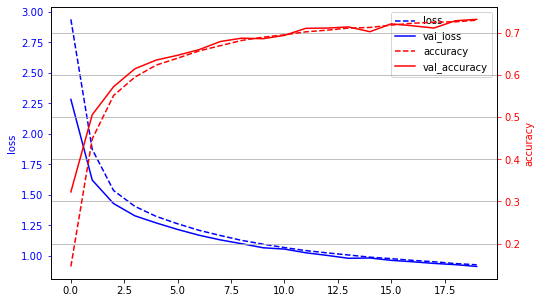

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


his = history.history 
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ln1 = ax.plot(his['loss'], 'b--',label='loss')
ln2 = ax.plot(his['val_loss'], 'b-',label='val_loss')
ax.set_ylabel('loss', color='blue')
ax.tick_params(axis='y', colors="blue")

ax2 = ax.twinx()
ln3 = ax2.plot(his['accuracy'], 'r--',label='accuracy')
ln4 = ax2.plot(his['val_accuracy'], 'r-',label='val_accuracy')
ax2.set_ylabel('accuracy', color='red')
ax2.tick_params(axis='y', colors="red")


lns = ln1 + ln2 + ln3 + ln4 
labels = [l.get_label() for l in lns]
ax.legend(lns, labels)
plt.grid(True)
plt.show()

To visualize using Tensorboard on the same jupyter notebook, we first need to load the TensorBoard extension. Then just calling the tensorboard with log file directory. 

In [23]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorboard --logdir tf_logs/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 11564.

#### <span style="color:#0b486b">6. Playing around with different optimizers</span>
In the following code we will try different optimizers to find which has the best performance (evaluate on the validation set). 
It can be done easily by passing an specific optimizer when compiling model. 


In [24]:
optimizer_names = ["Nadam", "Adam", "Adadelta", "Adagrad", "RMSprop", "SGD"]
optimizer_list = [keras.optimizers.Nadam(learning_rate=0.001), keras.optimizers.Adam(learning_rate=0.001), keras.optimizers.Adadelta(learning_rate=0.001), 
                  keras.optimizers.Adagrad(learning_rate=0.001), keras.optimizers.RMSprop(learning_rate=0.001), keras.optimizers.SGD(learning_rate=0.001)]
best_acc = 0
best_i = -1
for i in range(len(optimizer_list)):
    print("*Evaluating with {}\n".format(str(optimizer_names[i])))
    dnn_model.compile(optimizer=optimizer_list[i], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid), verbose=0)
    acc = dnn_model.evaluate(X_valid, y_valid)[1]
    print("The valid accuracy is {}\n".format(acc))
    if acc > best_acc:
        best_acc = acc
        best_i = i
print("The best valid accuracy is {} with {}".format(best_acc, optimizer_names[best_i]))
        

*Evaluating with Nadam

1500/1500 [==============================] - 0s 20us/sample - loss: 0.7491 - accuracy: 0.7680
The valid accuracy is 0.7680000066757202

*Evaluating with Adam

1500/1500 [==============================] - 0s 19us/sample - loss: 0.6767 - accuracy: 0.7920
The valid accuracy is 0.7919999957084656

*Evaluating with Adadelta

1500/1500 [==============================] - 0s 20us/sample - loss: 0.6694 - accuracy: 0.7953
The valid accuracy is 0.7953333258628845

*Evaluating with Adagrad

1500/1500 [==============================] - 0s 18us/sample - loss: 0.6641 - accuracy: 0.8007
The valid accuracy is 0.8006666898727417

*Evaluating with RMSprop

1500/1500 [==============================] - 0s 17us/sample - loss: 0.6345 - accuracy: 0.7953
The valid accuracy is 0.7953333258628845

*Evaluating with SGD

1500/1500 [==============================] - 0s 17us/sample - loss: 0.6213 - accuracy: 0.8040
The valid accuracy is 0.8040000200271606

The best valid accuracy is 0.8040000

#### <span style="color:#0b486b">7. Fine-tuning the learning rate</span>
Learning rate plays an important role when training a deep learning model. In the following code, we will try a simple greedy search to find a good learning rate. 

In [25]:
lr = [1e-2, 5e-3, 1e-3, 1e-4, 1e-5]

best_acc = 0
best_i = -1
for i in range(len(lr)):
    print("*Evaluating with learning rate = {}\n".format(str(lr[i])))
    dnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr[i]), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid), verbose=0)
    acc = dnn_model.evaluate(X_valid, y_valid)[1]
    print("The valid accuracy is {}\n".format(acc))
    if acc > best_acc:
        best_acc = acc
        best_i = i
print("The best valid accuracy is {} with learning rate {}".format(best_acc, lr[best_i]))

*Evaluating with learning rate = 0.01

1500/1500 [==============================] - 0s 18us/sample - loss: 0.5262 - accuracy: 0.8333
The valid accuracy is 0.8333333134651184

*Evaluating with learning rate = 0.005

1500/1500 [==============================] - 0s 20us/sample - loss: 0.4689 - accuracy: 0.8447
The valid accuracy is 0.8446666598320007

*Evaluating with learning rate = 0.001

1500/1500 [==============================] - 0s 18us/sample - loss: 0.3890 - accuracy: 0.8733
The valid accuracy is 0.8733333349227905

*Evaluating with learning rate = 0.0001

1500/1500 [==============================] - 0s 19us/sample - loss: 0.3902 - accuracy: 0.8713
The valid accuracy is 0.8713333606719971

*Evaluating with learning rate = 1e-05

1500/1500 [==============================] - 0s 17us/sample - loss: 0.3898 - accuracy: 0.8727
The valid accuracy is 0.8726666569709778

The best valid accuracy is 0.8733333349227905 with learning rate 0.001


#### <span style="color:#0b486b">8. Save and Load Models</span>

There are different ways to save TensorFlow models depending on the API you're using. As we used the Keras model in this tutorial, saving and loading it quite simple. It can be done by calling `model.save()` and `load_model()` methods. 
When calling `model.save()`, the entire model will be saved including: 
- The architecture, or configuration, which specifies what layers the model contain, and how they're connected.
- A set of weights values (the "state of the model").
- An optimizer (defined by compiling the model).
- A set of losses and metrics (defined by compiling the model or calling add_loss() or add_metric()).

In [26]:
# Saving the entire model to a directory
dnn_model.save('models/')

# Loading the model back 
from tensorflow import keras
loaded_model = keras.models.load_model('models/')

# Checking the loaded model 
print(dnn_model.predict(X_new) == loaded_model.predict(X_new))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/assets
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True]]


#### <span style="color:#0b486b">Save model during training</span>

One major disadvantage of the above saving method is that we cannot save the model during training but only when the training is finished. Therefore, it can be the case when the training was stopped/interrupted and we have to retrain again. To save model during training process, we can use the `ModelCheckpoint` callback allows you to continually save the model both during and at the end of training. 
Some important arguments of the `ModelCheckpoint` callback: 
- `filepath`: checkpoin directory 
- `save_weights_only`: if True, then only the model's weights will be saved (i.e., equal with model.save_weights(filepath)), else the full model is saved (i.e., equal with model.save(filepath) which saves: model' weight, model architecture, optimizer, etc.)
- `save_best_only`: if True, it only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten. The "best" model is evaluated based on "mode" and "monitor". For example, if `monitor=val_accuracy` it means that validation accuracy is used to monitor the best checkpoint, and `mode` should be set to `max`. If `monitor=val_loss` it means that validation loss is used instead, and `mode` in this case should be `min`. 

More detail can be found in the link: 
https://www.tensorflow.org/tutorials/keras/save_and_load

In [27]:
# Create a tf.keras.callbacks.ModelCheckpoint callback that saves weights only during training
checkpoint_path = "models/cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
dnn_model.fit(x=X_train, y=y_train, batch_size=32, 
                        epochs=20, 
                        validation_data=(X_valid, y_valid), 
                       callbacks=[tensorboard_callback, # Callback for writing log 
                                 cp_callback]) # Callback for saving model 


Train on 12000 samples, validate on 1500 samples
Epoch 1/20
11616/12000 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.9074
Epoch 00001: saving model to models/cp.ckpt
12000/12000 [==============================] - 1s 70us/sample - loss: 0.2986 - accuracy: 0.9066 - val_loss: 0.3897 - val_accuracy: 0.8727
Epoch 2/20
11648/12000 [============================>.] - ETA: 0s - loss: 0.3001 - accuracy: 0.9065
Epoch 00002: saving model to models/cp.ckpt
12000/12000 [==============================] - 1s 59us/sample - loss: 0.2986 - accuracy: 0.9068 - val_loss: 0.3897 - val_accuracy: 0.8727
Epoch 3/20
10912/12000 [==========================>...] - ETA: 0s - loss: 0.2958 - accuracy: 0.9082
Epoch 00003: saving model to models/cp.ckpt
12000/12000 [==============================] - 1s 57us/sample - loss: 0.2986 - accuracy: 0.9068 - val_loss: 0.3896 - val_accuracy: 0.8727
Epoch 4/20
11552/12000 [===========================>..] - ETA: 0s - loss: 0.2997 - accuracy: 0.9064
Epoch

#### <span style="color:#0b486b">Save model during training</span>
If we only saved the model's weight, we need to recreate a same architecture before loading the model weight. 

In [28]:
# Because we alreary created a model, therefore, we just need to load the weight 
# dnn_model = create_model() # skip this step
dnn_model.load_weights(checkpoint_path)

If we saved the entire model (by set `save_weights_only=False`), then the pretrained model can be reloaded by `load_model` method

### <span style="color:#0b486b"> II.3 Two Approaches to Build Up Models with TensorFlow 2.x</span> <span style="color:red">*** (relatively important)</span>

There are two approaches to build up a model with tensorflow 2.x, a simple method using **Sequential API** and a more flexible method using **Functional API**.  

#### <span style="color:#0b486b"> Approach 1: Using `Sequential API`</span>

In [29]:
dnn_model = Sequential()
dnn_model.add(Dense(units=10,  input_shape=(16,), activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=15, activation='relu'))
dnn_model.add(Dense(units=26, activation='softmax'))
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### <span style="color:#0b486b"> Approach 2: Using `Functional API`</span>

In [30]:
X = tf.keras.layers.Input(shape=(16,)) #declare input layer
h = Dense(units=10, activation= 'relu')(X)
h = Dense(units=20, activation= 'relu')(h)
h = Dense(units=15, activation= 'relu')(h)
h = Dense(units=26, activation= 'softmax')(h)
dnn_model = tf.keras.Model(inputs= X, outputs=h)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

We can also declare a class inherited from `tf.keras.Model`

In [31]:
class MyDNN(tf.keras.Model):
    def __init__(self, n_classes= 26):
        super(MyDNN, self).__init__()
        self.n_classes = n_classes
        self.dense1 = tf.keras.layers.Dense(units=10, activation= 'relu')
        self.dense2 = tf.keras.layers.Dense(units=20, activation= 'relu')
        self.dense3 = tf.keras.layers.Dense(units=15, activation= 'relu')
        self.dense4 = tf.keras.layers.Dense(units=self.n_classes, activation= 'softmax')
    
    def call(self,X): #X is the input, method call specifies how to compute the output from the input X
        h = self.dense1(X)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return h
dnn_model = MyDNN(n_classes= 26)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### <span style="color:#0b486b"> II.4 Other approaches to Train a Model with TensorFlow 2.x</span> <span style="color:red">*** (relatively important)</span>

There are two main approaches to training a model with Tensorflow 2.x. The simplest method is the `fit` method as we did before. This method automatically helps us to process data when training (e.g., split an entire dataset into multiple mini-batches), applies callback methods such as saving model or writing TensorBoard and monitors validation performance. 

However, some projects require more handly on training process (for example, doing data augmentation in self-supervised learning or training a generative model that we will learn later in this unit). In this case, we need an ability/understanding to train a model manually. In Tensorflow 2.X, we can do that with `train_on_batch` method. Basically, we will need to *(1) manually split entire dataset into mini-batches and applied data augmentaion (if any)* and *(2) feed training data to `train_on_batch` method*. It returns a training loss (which is pre-defined when compiling model) and an updated model. 

The following code is a simple example (without any data-augmentation). 

In [32]:
n_epochs =20
batch_size = 64
for epoch in range(n_epochs):
    for idx_start in range(0, X_train.shape[0], batch_size):
        idx_end = min(X_train.shape[0], idx_start + batch_size)
        X_batch, y_batch = X_train[idx_start:idx_end], y_train[idx_start:idx_end]
        train_loss_batch = dnn_model.train_on_batch(X_batch, y_batch)  #return the batch loss
        
    train_loss, train_acc = dnn_model.evaluate(x= X_train, y= y_train, batch_size= 64, verbose= 0)
    valid_loss, valid_acc = dnn_model.evaluate(x= X_valid, y= y_valid, batch_size= 64, verbose= 0)
    print('Epoch {}: train acc={:.4f}, train loss={:.4f} | valid acc={:.4f}, valid loss= {:.4f}'.format(epoch +1, 
                                                                                                        train_acc, 
                                                                                                        train_loss, 
                                                                                                        valid_acc, 
                                                                                                        valid_loss))

Epoch 1: train acc=0.1510, train loss=2.8678 | valid acc=0.1573, valid loss= 2.8721
Epoch 2: train acc=0.3644, train loss=2.0786 | valid acc=0.3533, valid loss= 2.0877
Epoch 3: train acc=0.5075, train loss=1.6448 | valid acc=0.4947, valid loss= 1.6496
Epoch 4: train acc=0.5758, train loss=1.4298 | valid acc=0.5633, valid loss= 1.4345
Epoch 5: train acc=0.6065, train loss=1.3327 | valid acc=0.5880, valid loss= 1.3390
Epoch 6: train acc=0.6285, train loss=1.2727 | valid acc=0.6080, valid loss= 1.2805
Epoch 7: train acc=0.6465, train loss=1.2245 | valid acc=0.6293, valid loss= 1.2329
Epoch 8: train acc=0.6597, train loss=1.1807 | valid acc=0.6387, valid loss= 1.1892
Epoch 9: train acc=0.6717, train loss=1.1417 | valid acc=0.6580, valid loss= 1.1502
Epoch 10: train acc=0.6824, train loss=1.1079 | valid acc=0.6667, valid loss= 1.1171
Epoch 11: train acc=0.6892, train loss=1.0780 | valid acc=0.6820, valid loss= 1.0883
Epoch 12: train acc=0.6977, train loss=1.0516 | valid acc=0.6893, valid lo

### <span style="color:#0b486b"> Additional Exercises </span> 

1. Write your own code to save a trained model to the hard disk and restore this model, then use the restored model to output the prediction result on the test set.

2. Insert new code to the above code to enable outputting to TensorBoard the values of `training loss`, `training accuracy`, `valid loss`, and `valid accuracy` at the end of epochs. You can refer to the code [here](https://www.tensorflow.org/tensorboard/get_started).

3. Write code to do regression on the dataset `cadata` which can be downloaded [here](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html). Note that for a regression problem, you need to use the `L2` loss instead of the `cross-entropy` loss as in a classification problem. 

4. Using the problem in this tutorial, however, using a much deeper network (i.e., $16 \rightarrow 100 (ReLU) \rightarrow 200 (ReLU) \rightarrow 200 (ReLU) \rightarrow 100 (ReLu) \rightarrow 26$). Applying callback methods to save the model on training and writing a TensorBoard. Visualize `training loss`, `training accuracy`, `valid loss`, and `valid accuracy`. Provide observation and explanation of any issue if happen (hint, overfitting issue). 

5. Build up a more complex feedforward neural network with `Functional API` method  as shown in figure below. The network splits into two branches and then merges in the last layer. The concatenate operation is in the last dimenstion (for example, two arrays [10,15], [10,15] will be concatenated to an array [10,30].

<img src="./images/feed-forward-2branches.PNG" width="1000">

---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>

### <span style="color:#FFA500"> Solution for exercise 1

A Keras model can be saved and restored via two functions `save()` and `load_model()`.

In [29]:
from tensorflow.keras import models 
checkpoint_path = "ckpt/tf2"

dnn_model.save(checkpoint_path)
reconstructed_model = models.load_model(checkpoint_path)

print("Model is saved to: {}".format(checkpoint_path))

INFO:tensorflow:Assets written to: ckpt/tf2\assets
Model is saved to: ckpt/tf2


We now can evaluate the reconstructed model on the test sett.

In [30]:
reconstructed_model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 689us/step - loss: 0.9864 - accuracy: 0.7200


[0.9864100813865662, 0.7200000286102295]

### <span style="color:#FFA500"> Solution for exercise 2

Firstly, we define a deep learning model. 

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
X = tf.keras.layers.Input(shape=(16,)) # declare input layer
h = Dense(units=10, activation= 'relu')(X)
h = Dense(units=20, activation= 'relu')(h)
h = Dense(units=15, activation= 'relu')(h)
h = Dense(units=26, activation= 'softmax')(h)
dnn_model = tf.keras.Model(inputs= X, outputs=h)

Next, let us combine the defined model with an optimizer, loss, and metrics.
Adding a `tf.keras.callbacks.TensorBoard` callback will enable outputting the values of `training loss`, `training accuracy`, `valid loss`, and `valid accuracy` at the end of epochs.

In [33]:
import datetime
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
log_dir = "logs/tf2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  # declare the directory to save logs.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.9862 - accuracy: 0.1168 - val_loss: 2.3230 - val_accuracy: 0.2913
Epoch 2/100
375/375 [==============================] - 0s 691us/step - loss: 1.8472 - accuracy: 0.4440 - val_loss: 1.5941 - val_accuracy: 0.5400
Epoch 3/100
375/375 [==============================] - 0s 686us/step - loss: 1.4707 - accuracy: 0.5722 - val_loss: 1.3960 - val_accuracy: 0.5980
Epoch 4/100
375/375 [==============================] - 0s 671us/step - loss: 1.3151 - accuracy: 0.6125 - val_loss: 1.2630 - val_accuracy: 0.6373
Epoch 5/100
375/375 [==============================] - 0s 688us/step - loss: 1.2262 - accuracy: 0.6387 - val_loss: 1.1913 - val_accuracy: 0.6573
Epoch 6/100
375/375 [==============================] - 0s 683us/step - loss: 1.1632 - accuracy: 0.6650 - val_loss: 1.1486 - val_accuracy: 0.6793
Epoch 7/100
375/375 [==============================] - 0s 683us/step - loss: 1.1128 - accuracy: 0.6813 - val_loss: 1.1014 - val_accu

- Open command line, nevigate to the folder of this tute and run **> tensorboard --logdir "logs/tf2"**

### <span style="color:#FFA500"> Solution for exercise 3

In [34]:
# We load and process the dataset
data_file_name= "cadata.libsvm"
data_file = os.path.abspath("./data/" + data_file_name)
X_data, y_data = load_svmlight_file(data_file)
X_data= X_data.toarray()
y_data= y_data.reshape(y_data.shape[0],-1)
print("X data shape: {}".format(X_data.shape))
print("y data shape: {}".format(y_data.shape))
print("x-min={}, x-max={}".format(np.min(X_data), np.max(X_data)))
print("We need to scale the features of this data into [-1,1]")

X data shape: (20640, 8)
y data shape: (20640, 1)
x-min=-124.35, x-max=39320.0
We need to scale the features of this data into [-1,1]


In [35]:
# We scale the features of this data into [-1,1]
from sklearn.preprocessing import MinMaxScaler
X_data= MinMaxScaler(feature_range= (-1,1)).fit_transform(X_data)
print("x-min={}, x-max={}".format(np.min(X_data), np.max(X_data)))

x-min=-1.0, x-max=1.0


In [36]:
print("Before scaling: y-min ={}, y-max ={}".format(np.min(y_data), np.max(y_data)))
y_data= MinMaxScaler(feature_range= (-1,1)).fit_transform(y_data)
print("After scaling: y-min ={}, y-max ={}".format(np.min(y_data), np.max(y_data)))
print("Next step is to split the dataset into train (80%), valid (10%), and test (10%)")

Before scaling: y-min =14999.0, y-max =500001.0
After scaling: y-min =-0.9999999999999999, y-max =1.0
Next step is to split the dataset into train (80%), valid (10%), and test (10%)


In [37]:
# We split train, valid and test data
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data, train_size=0.8, test_size=0.1)
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)
y_valid= y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("Three sets are ready! Next step is to build up a deep neural network.")

(16512, 8) (2064, 8) (2064, 8)
(16512,) (2064,) (2064,)
Three sets are ready! Next step is to build up a deep neural network.


In [38]:
regression_model = Sequential()
regression_model.add(Dense(units=1)) # output has only one neuron
regression_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

In [39]:
history = regression_model.fit(x= X_train, y= y_train, batch_size= 32, epochs= 50, validation_data = (X_valid, y_valid))

Epoch 1/50
516/516 [==============================] - 0s 503us/step - loss: 1.1897 - val_loss: 0.9961
Epoch 2/50
516/516 [==============================] - 0s 399us/step - loss: 0.8215 - val_loss: 0.7060
Epoch 3/50
516/516 [==============================] - 0s 391us/step - loss: 0.5978 - val_loss: 0.5356
Epoch 4/50
516/516 [==============================] - 0s 392us/step - loss: 0.4707 - val_loss: 0.4409
Epoch 5/50
516/516 [==============================] - 0s 395us/step - loss: 0.4016 - val_loss: 0.3885
Epoch 6/50
516/516 [==============================] - 0s 392us/step - loss: 0.3617 - val_loss: 0.3550
Epoch 7/50
516/516 [==============================] - 0s 395us/step - loss: 0.3342 - val_loss: 0.3292
Epoch 8/50
516/516 [==============================] - 0s 383us/step - loss: 0.3118 - val_loss: 0.3070
Epoch 9/50
516/516 [==============================] - 0s 383us/step - loss: 0.2923 - val_loss: 0.2875
Epoch 10/50
516/516 [==============================] - 0s 386us/step - loss: 0.275

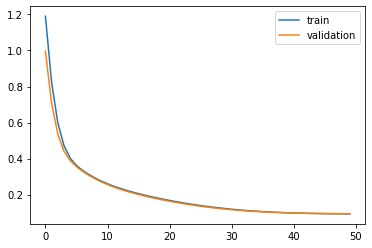

In [40]:
# plot losses during training
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

We now can evaluate our regression model on the test set.

In [41]:
regression_model.evaluate(X_test, y_test) 

65/65 [==============================] - 0s 372us/step - loss: 0.0942


0.0941537469625473

### <span style="color:#FFA500"> Solution for exercise 4

4. Using the problem in this tutorial, however, using a much deeper network (i.e., $16 \rightarrow 100 (ReLU) \rightarrow 200 (ReLU) \rightarrow 200 (ReLU) \rightarrow 100 (ReLu) \rightarrow 26$). Applying callback methods to save the model on training and writing a TensorBoard. Visualize `training loss`, `training accuracy`, `valid loss`, and `valid accuracy`. Provide observation and explanation of any issue if happen (hint, overfitting issue). 

In [30]:
# Build a new model with much more parameters 
X = tf.keras.layers.Input(shape=(16,)) #declare input layer
h = Dense(units=1000, activation= 'relu')(X)
h = Dense(units=2000, activation= 'relu')(h)
h = Dense(units=2000, activation= 'relu')(h)
h = Dense(units=1000, activation= 'relu')(h)
h = Dense(units=26, activation= 'softmax')(h)
dnn_model = tf.keras.Model(inputs= X, outputs=h)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow import keras
# Declare a callback for writing a TensorBoard 
logdir = "tf_logs/"

# Init a tensorboard_callback 
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
# Create a tf.keras.callbacks.ModelCheckpoint callback that saves weights only during training
checkpoint_path = "models/cp_deeper.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, 
                        epochs=20, 
                        validation_data=(X_valid, y_valid), 
                       callbacks=[tensorboard_callback, # Callback for writing log 
                                 cp_callback]) # Callback for saving model 

Epoch 1/20
375/375 [==============================] - ETA: 0s - loss: 1.0179 - accuracy: 0.6851
Epoch 00001: saving model to models/cp_deeper.ckpt
375/375 [==============================] - 19s 50ms/step - loss: 1.0179 - accuracy: 0.6851 - val_loss: 0.5464 - val_accuracy: 0.8280
Epoch 2/20
375/375 [==============================] - ETA: 0s - loss: 0.4501 - accuracy: 0.8552
Epoch 00002: saving model to models/cp_deeper.ckpt
375/375 [==============================] - 18s 48ms/step - loss: 0.4501 - accuracy: 0.8552 - val_loss: 0.3642 - val_accuracy: 0.8793
Epoch 3/20
374/375 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.9042
Epoch 00003: saving model to models/cp_deeper.ckpt
375/375 [==============================] - 19s 51ms/step - loss: 0.2933 - accuracy: 0.9043 - val_loss: 0.3454 - val_accuracy: 0.8827
Epoch 4/20
375/375 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.9247
Epoch 00004: saving model to models/cp_deeper.ckpt
375/375 [====

We now can evaluate the trained model on the testing set or any subset.

In [33]:
dnn_model.evaluate(X_test, y_test)  #return loss and accuracy

47/47 [==============================] - 0s 8ms/step - loss: 0.2093 - accuracy: 0.9507


[0.20930108428001404, 0.9506666660308838]

In [34]:
# # Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir tf_logs/

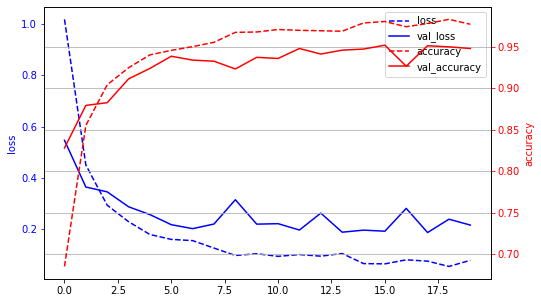

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


his = history.history 
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ln1 = ax.plot(his['loss'], 'b--',label='loss')
ln2 = ax.plot(his['val_loss'], 'b-',label='val_loss')
ax.set_ylabel('loss', color='blue')
ax.tick_params(axis='y', colors="blue")

ax2 = ax.twinx()
ln3 = ax2.plot(his['accuracy'], 'r--',label='accuracy')
ln4 = ax2.plot(his['val_accuracy'], 'r-',label='val_accuracy')
ax2.set_ylabel('accuracy', color='red')
ax2.tick_params(axis='y', colors="red")


lns = ln1 + ln2 + ln3 + ln4 
labels = [l.get_label() for l in lns]
ax.legend(lns, labels)
plt.grid(True)
plt.show()

Some observations: 

(1) The training loss has decreased over time while the validation loss seems saturated after epoch 7th. In fact, the validation loss even increases a bit in epoch 8th. 

(2) Analogously, while the training accuracy is increased over time, the validation accuracy is saturated after epoch 7 and a drop in epochs 8th and 16th. 

### <span style="color:#FFA500"> Solution for exercise 5

<img src="./images/feed-forward-2branches.PNG" width="1000">

In [20]:
# Recall the model architecture as figure above 
# Implement using Functional API 
X = tf.keras.layers.Input(shape=(16,)) #declare input layer
h = Dense(units=10, activation= 'relu')(X)

# First branch 
h1 = Dense(units=20, activation= 'relu')(h)
h1 = Dense(units=15, activation= 'relu')(h1)

# Second branch 
h2 = Dense(units=20, activation= 'relu')(h)
h2 = Dense(units=15, activation= 'relu')(h2)

# Concatenate in the last dimention 
h = tf.concat([h1,h2], axis=-1)

# Last layer 
h = Dense(units=26, activation= 'softmax')(h)
dnn_model = tf.keras.Model(inputs= X, outputs=h)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
dnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 10)           170         input_2[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 20)           220         dense_9[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 20)           220         dense_9[0][0]                    
______________________________________________________________________________________________